In [1]:
import os
# Get the current working directory (where this notebook is located)
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
# Change the working directory to the parent directory
os.chdir(parent_dir)

In [17]:
from p2ch15.dsets import getCandidateInfoList, getCt, LunaDataset
candidateInfo_list = getCandidateInfoList(require_on_disk=False)
print(len(candidateInfo_list))
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

551065


In [3]:
print(len(positiveInfo_list))
print(positiveInfo_list[0])

1351
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))


In [4]:
candidateInfo_list[:3]

[CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567)),
 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))]

In [15]:
# dataset = LunaDataset(sortby_str="series_uid")
dataset = LunaDataset(sortby_str="label_and_size")
for item in dataset:
    candidate_tensor, nodule_class, series_uid, center_irc = item
    print(nodule_class)
    break
nodule_class

2025-01-15 23:58:28,300 INFO     pid:23920 p2ch15.dsets:189:__init__ <p2ch15.dsets.LunaDataset object at 0x00000297EE5D2F20>: 551065 training samples


tensor([0, 1])


tensor([0, 1])

In [16]:
candidate_tensor.shape

torch.Size([1, 32, 48, 48])

In [4]:
from p2ch15.vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples(limit=15)

2025-01-15 22:31:11,789 INFO     pid:33396 p2ch15.dsets:182:__init__ <p2ch15.dsets.LunaDataset object at 0x0000027CBB32F1C0>: 551065 training samples


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
5 CandidateInfoTuple(isNodule_bool=True, dia

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from p2ch15.dsets import Ct, LunaDataset
def showCandidate(series_uid, batch_ndx=None, **kwargs):
    ds = LunaDataset(series_uid=series_uid, **kwargs)
    pos_list = [i for i, x in enumerate(ds.candidateInfo_list) if x.isNodule_bool]
    print(pos_list)

    def determine_batch_index(batch_ndx, pos_list):
        if batch_ndx is None:
            if pos_list:
                return pos_list[0]
            else:
                print("Warning: no positive samples found; using first negative sample.")
                return 0
        return batch_ndx

    def plot_ct_slices(fig, ct, i, r, c):
        plot_slice(fig, 1, 'ct index {}'.format(int(i)), ct.hu_a[int(i)])
        plot_slice(fig, 2, 'ct row {}'.format(int(r)), ct.hu_a[:, int(r)], invert_y=True)
        plot_slice(fig, 3, 'ct col {}'.format(int(c)), ct.hu_a[:, :, int(c)], invert_y=True)

    def plot_smaller_scale_slices(fig, ct_a, i, r, c):
        plot_slice(fig, 4, 'ct index {} (smaller scale)'.format(int(i)), ct_a[ct_a.shape[0] // 2], smaller_scale=True)
        plot_slice(fig, 5, 'ct row {} (smaller scale)'.format(int(r)), ct_a[:, ct_a.shape[1] // 2], invert_y=True)
        plot_slice(fig, 6, 'ct col {} (smaller scale)'.format(int(c)), ct_a[:, :, ct_a.shape[2] // 2], invert_y=True)
    
    def plot_group_slices(fig, ct_a, group_list):
        for row, index_list in enumerate(group_list):
            for col, index in enumerate(index_list):
                plot_slice(fig, row * 3 + col + 7, 'slice {}'.format(index), ct_a[index])
                
    def plot_slice(fig, position, title, data, invert_y=False, smaller_scale=False):
        subplot = fig.add_subplot(len(group_list) + 2, 3, position)
        subplot.set_title(title, fontsize=30)
        for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
            label.set_fontsize(20)
        clim=(-1000.0, 300)
        plt.imshow(data, clim=clim, cmap='gray')
        if invert_y:
            plt.gca().invert_yaxis()
        if smaller_scale:
            subplot.set_xticks(np.arange(0, data.shape[1], step=10))
            subplot.set_yticks(np.arange(0, data.shape[0], step=10))

    batch_ndx = determine_batch_index(batch_ndx, pos_list)
    ct = Ct(series_uid)
    ct_t, pos_t, series_uid, center_irc = ds[batch_ndx]
    ct_a = ct_t[0].numpy()
    fig = plt.figure(figsize=(30, 50))
    group_list = [
        [9, 11, 13],
        [15, 16, 17],
        [19, 21, 23],
    ]
    i, r, c = center_irc
    plot_ct_slices(fig, ct, i, r, c)
    plot_smaller_scale_slices(fig, ct_a, i, r, c)
    plot_group_slices(fig, ct_a, group_list)
    print(series_uid, batch_ndx, bool(pos_t[0]), pos_list)

2025-01-15 22:48:07,397 INFO     pid:33396 p2ch15.dsets:182:__init__ <p2ch15.dsets.LunaDataset object at 0x0000027CC8990310>: 602 training samples


[117, 232, 353, 401, 527, 536, 594]
1.3.6.1.4.1.14519.5.2.1.6279.6001.183982839679953938397312236359 117 False [117, 232, 353, 401, 527, 536, 594]


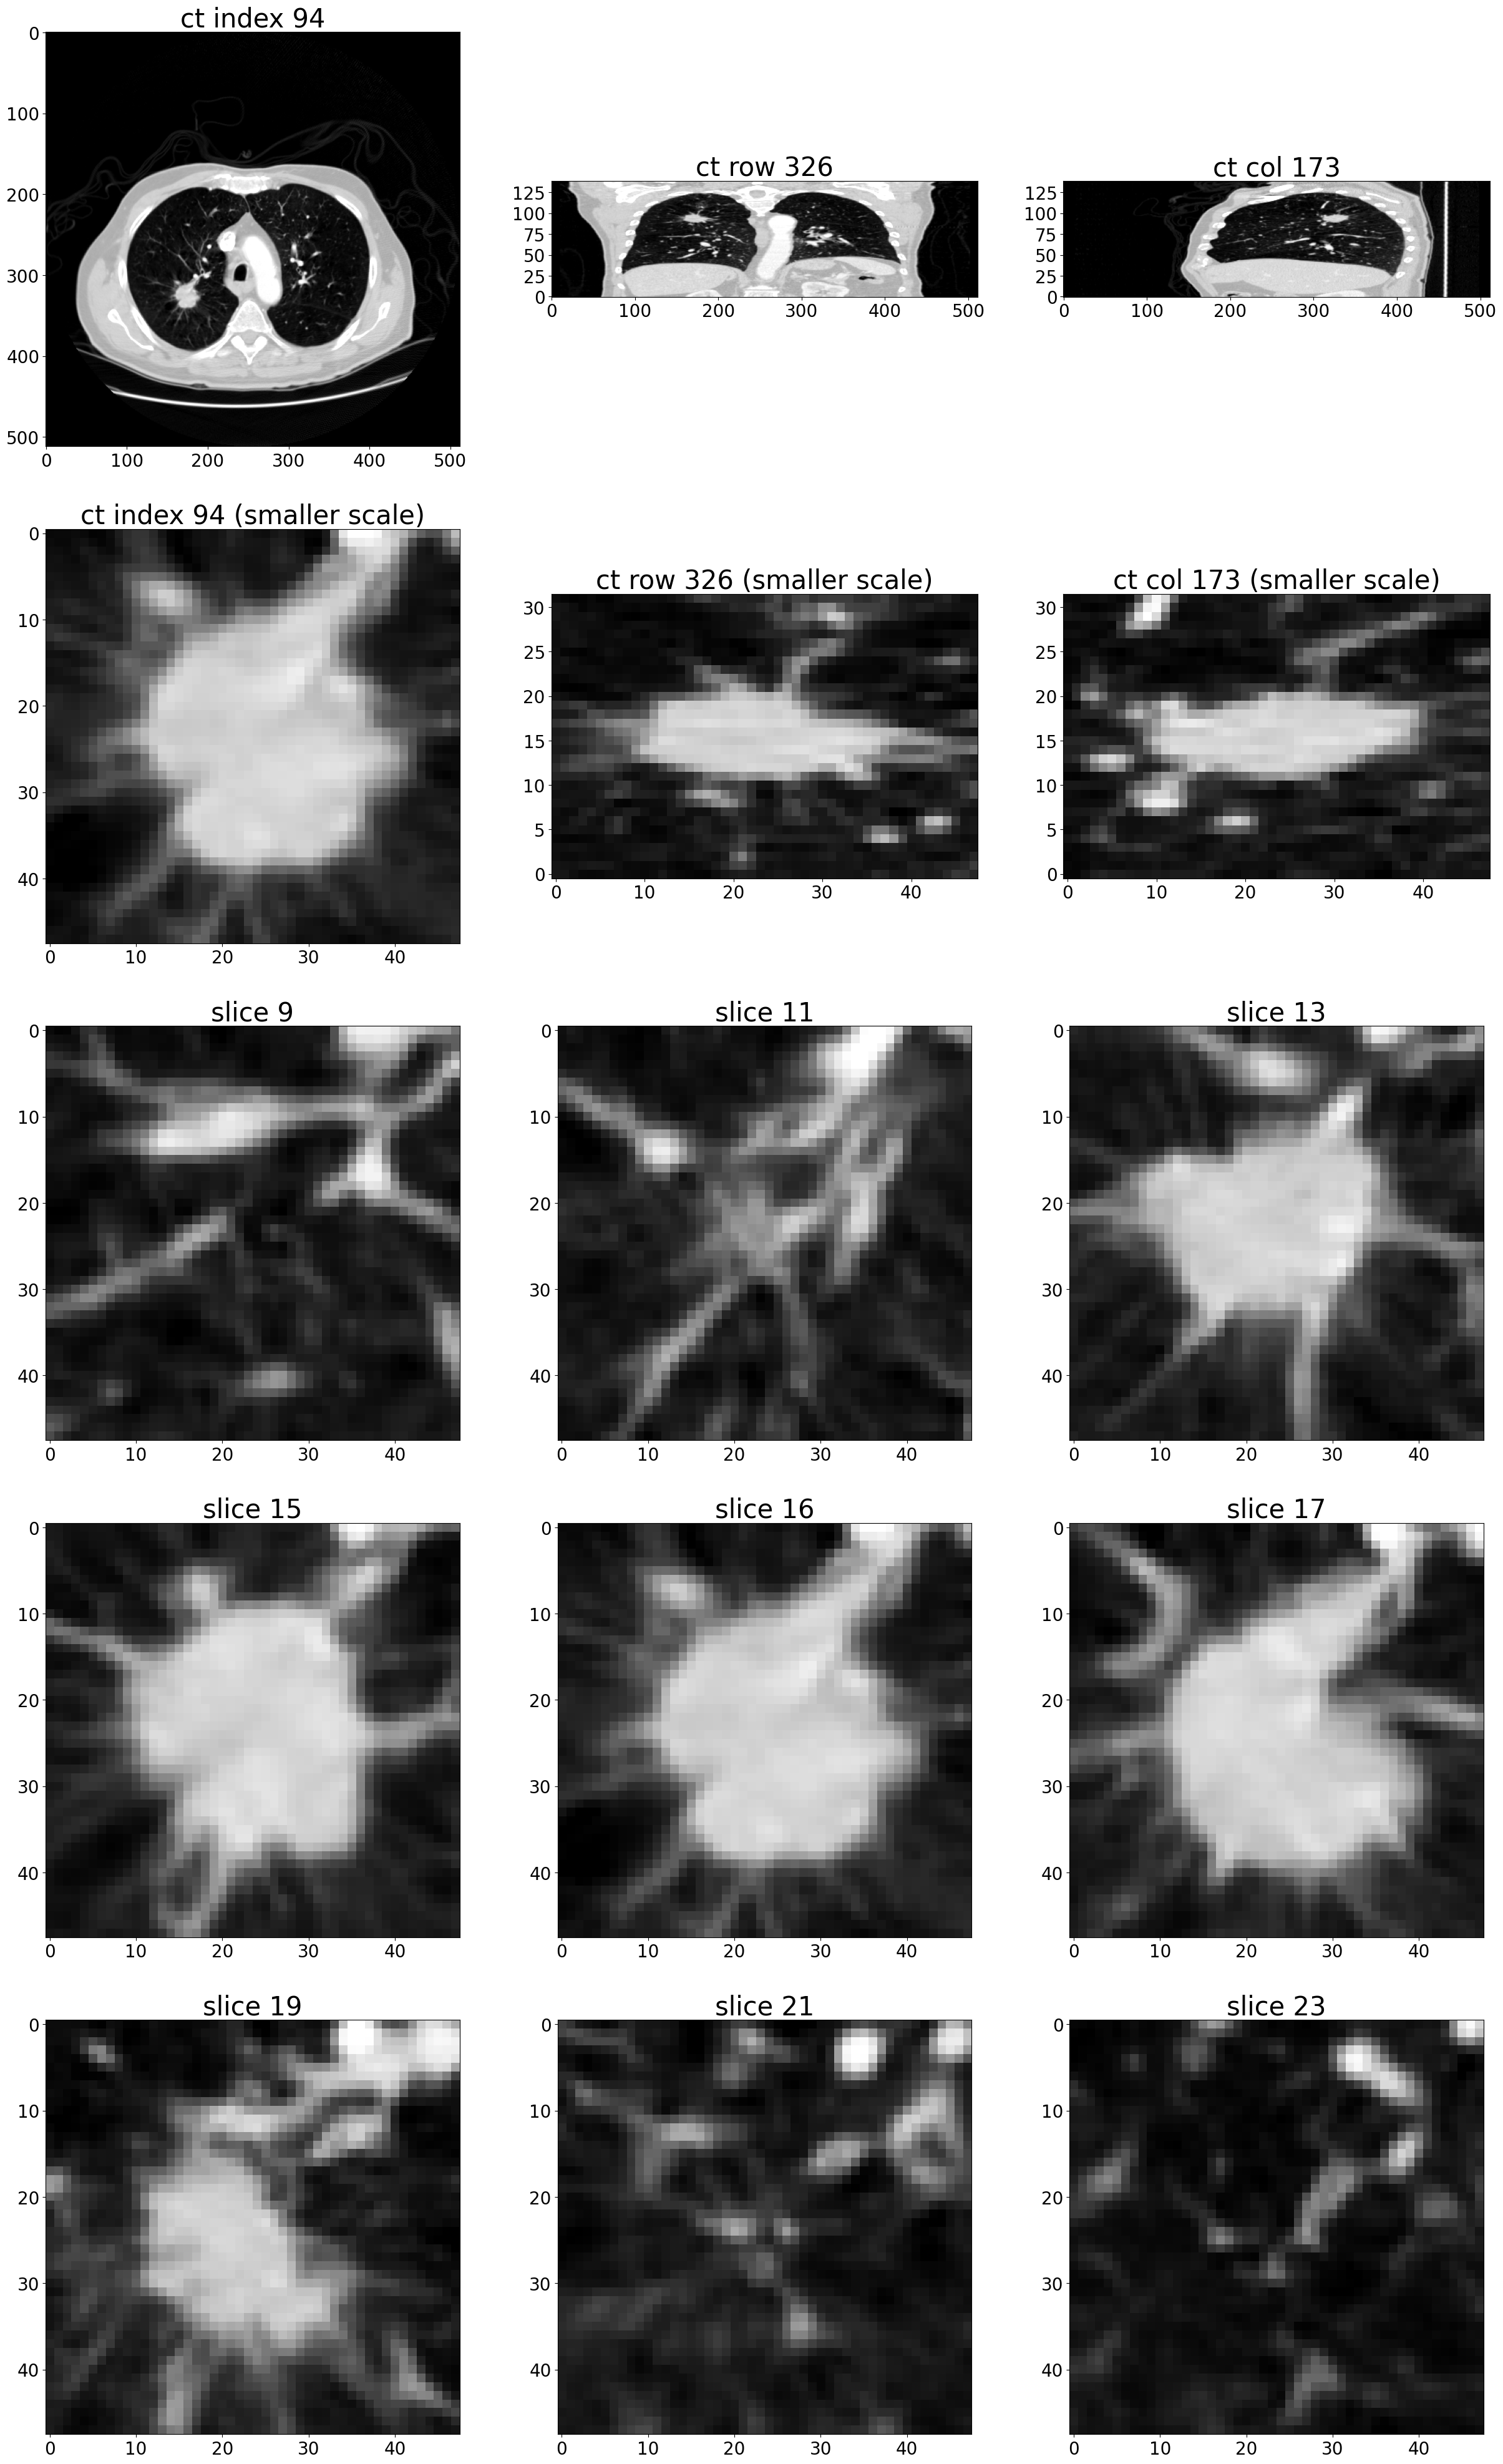

In [13]:
series_uid = positiveSample_list[11][2]
showCandidate(series_uid)

2025-01-15 22:25:17,656 INFO     pid:26552 p2ch15.dsets:182:__init__ <p2ch15.dsets.LunaDataset object at 0x0000028B4E48A980>: 911 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800
1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800 0 False [0, 80, 320, 682, 693, 715, 888]


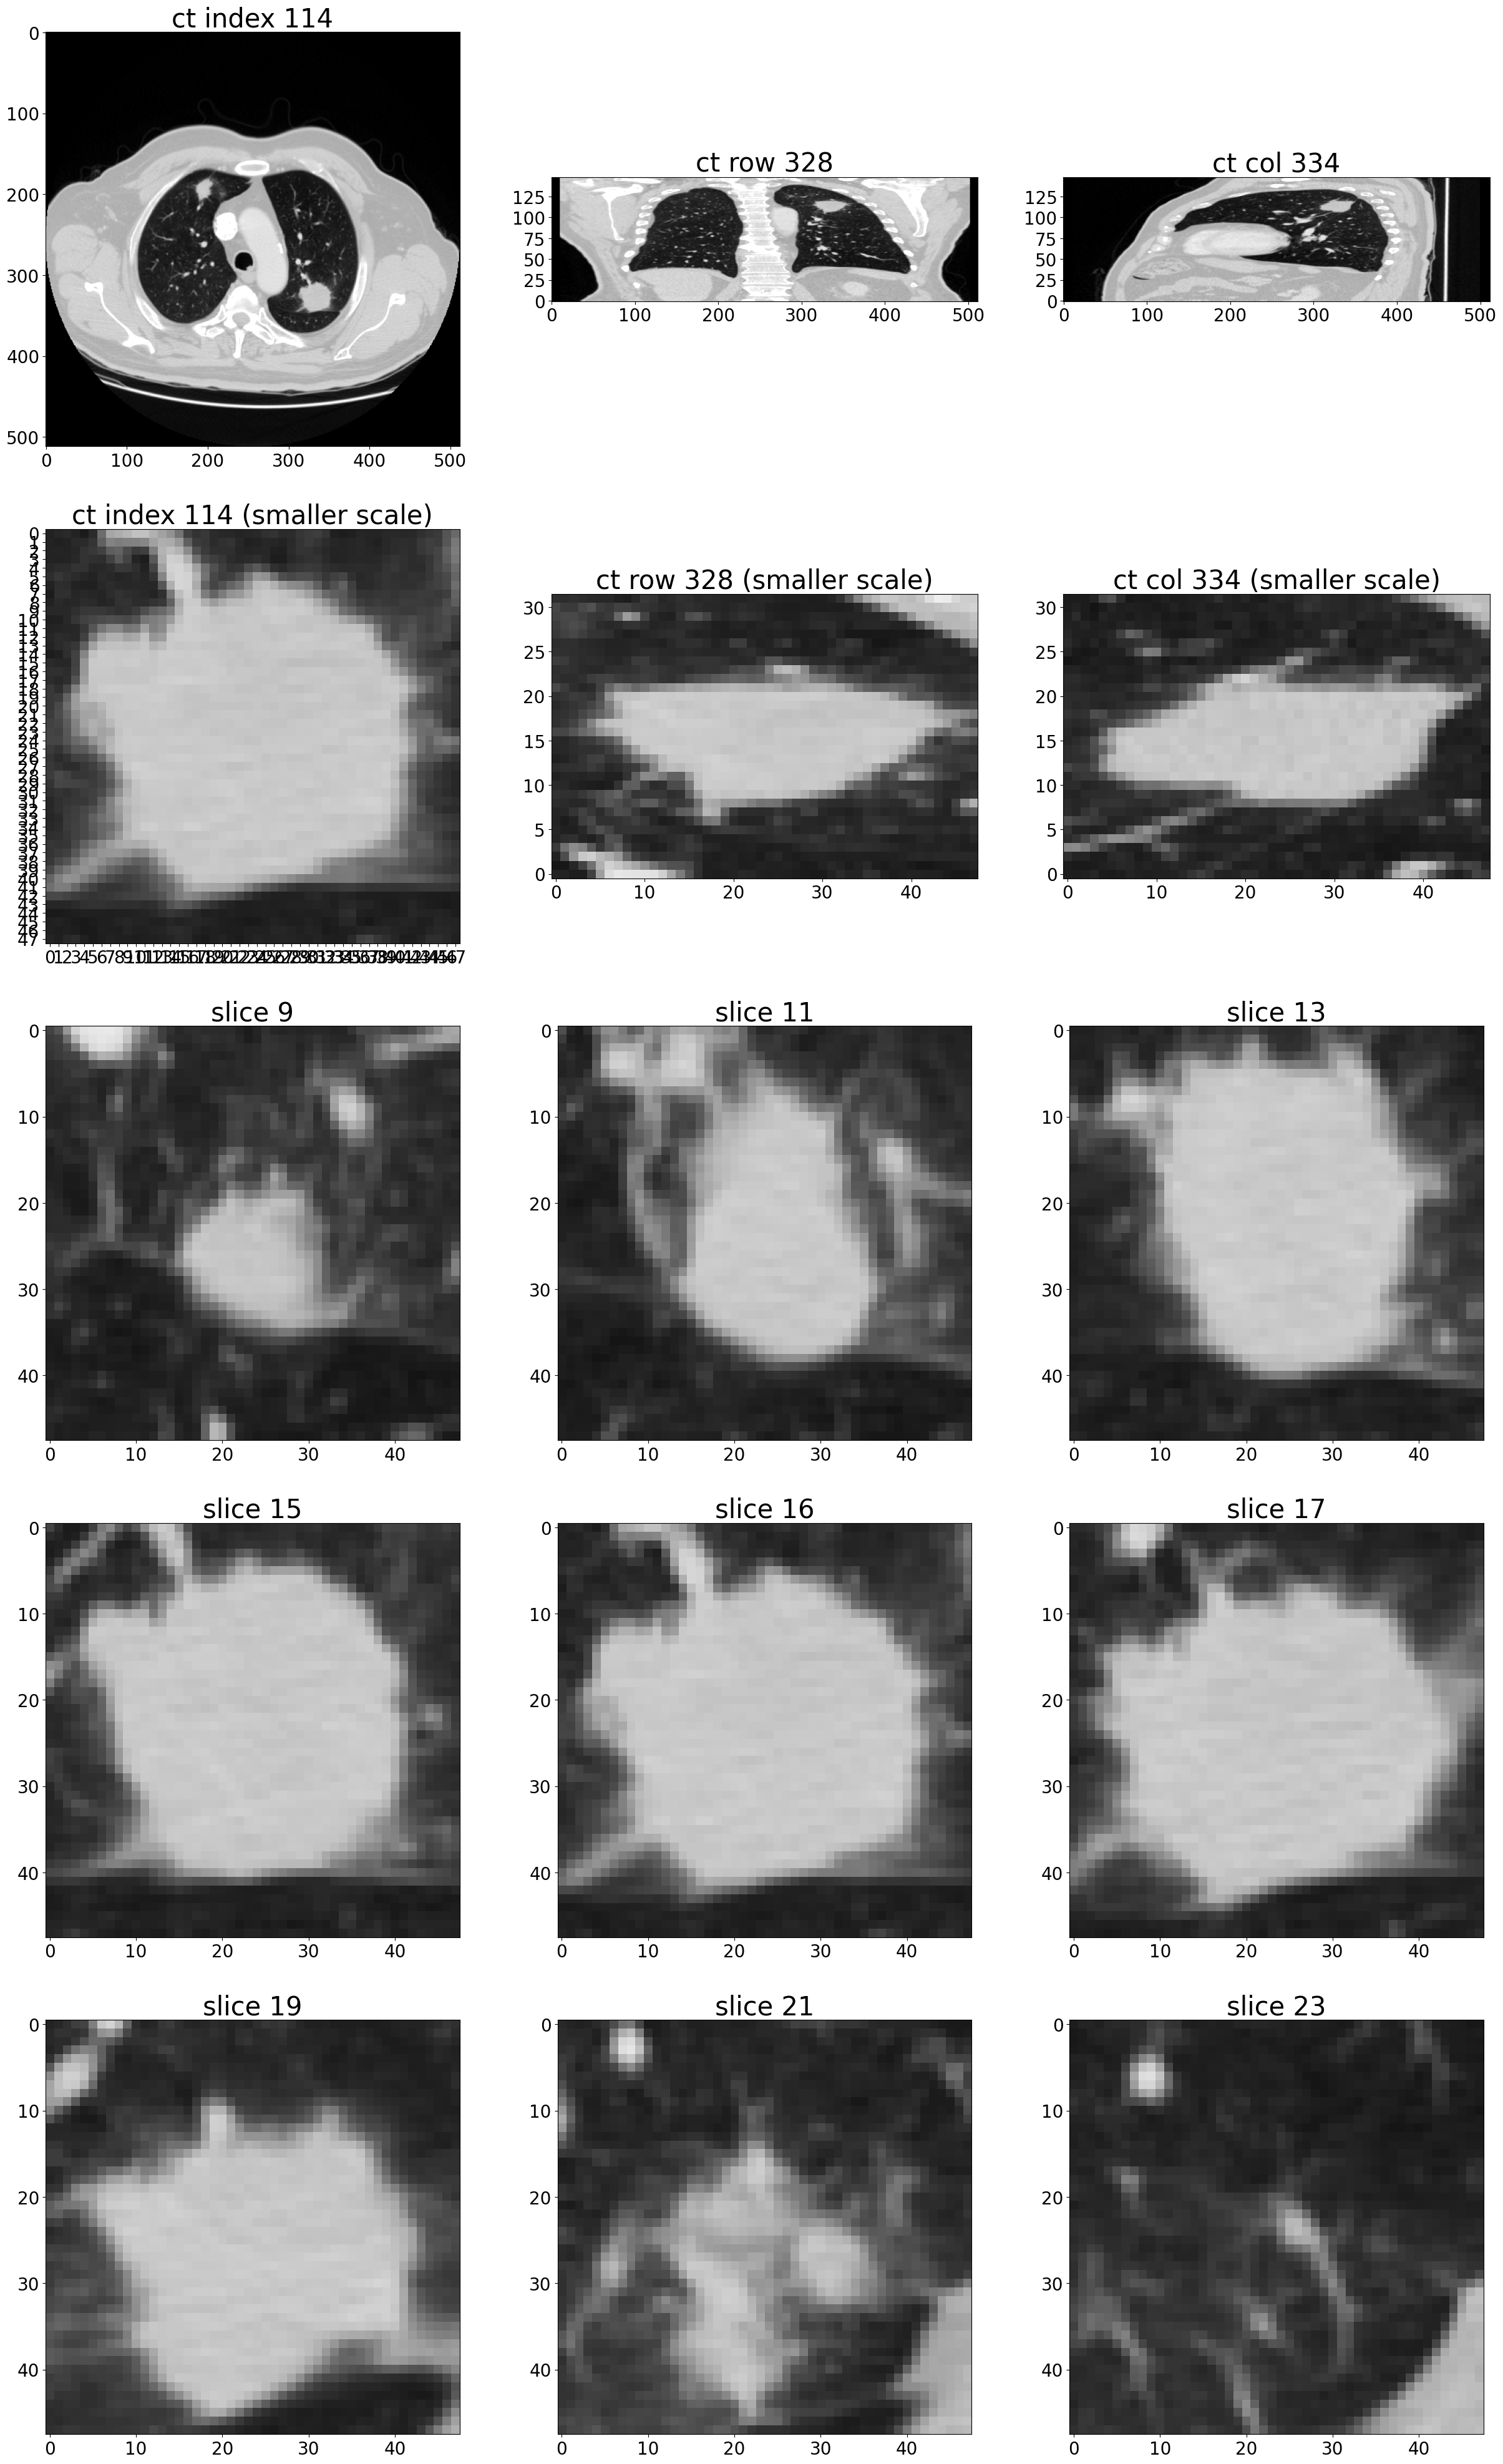

In [6]:
series_uid = positiveSample_list[1][2]
print(series_uid)
showCandidate(series_uid)